<a href="https://colab.research.google.com/github/EronDS/Bioinformatics/blob/main/Tools_for_Bioinformatics/MendelianInheritance/2ndLawIndependantSegregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np 
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

In [2]:
def F1_production(p1 =['AA','bb'], p2 = ['aa', 'BB']): #maximum of 3 alleles

    p1_a_alleles = list(p1[0])
    p1_b_alleles = list(p1[1])

    p2_a_alleles = list(p2[0])
    p2_b_alleles = list(p2[1])

    letter_1 = list(p1_a_alleles)[0]
    letter_2 = list(p1_b_alleles)[0]

    het_1 = letter_1.upper() + letter_1.lower()
    het_2 = letter_2.upper() + letter_2.lower() 

    not_1 = letter_1.lower() + letter_1.upper()
    not_2 = letter_2.lower() + letter_2.upper()

    f1_a = [] 
    for alleles in p1_a_alleles:
        for all in p2_a_alleles:
            f1_a.append(alleles + all)
    f1_b = [] 

    for alleles in p1_b_alleles:
        for all in p2_b_alleles:
            f1_b.append(alleles + all)

    for individual in range(len(f1_a)):
        if f1_a[individual] == not_1:
            f1_a[individual] = het_1
    for individual in range(len(f1_b)):
        if f1_b[individual] == not_2:
            f1_b[individual] = het_2


    return f1_a, f1_b

In [3]:
len([])

0

In [4]:
f1_a,f1_b = F1_production(p1 = ['YY','rr'], p2 = ['yy','RR'])
print(f1_a,f1_b)

['Yy', 'Yy', 'Yy', 'Yy'] ['Rr', 'Rr', 'Rr', 'Rr']


In [5]:
def F2_production(f1_a = ['Aa'] * 4, f1_b = ['Bb'] * 4):

    fem = [0,2]
    mal = [1,3]

    f1_individuals_1_a, f1_individuals_2_a, f1_individuals_1_b, f1_individuals_2_b = [] , [] , [] , []  

    for gametes in range(len(f1_a)):
        if gametes % 2 == 0:
            f1_individuals_1_a.append(f1_a[gametes])
            f1_individuals_1_b.append(f1_b[gametes])
        
        if gametes % 2 != 0:
            f1_individuals_2_a.append(f1_a[gametes])
            f1_individuals_2_b.append(f1_b[gametes])
    individuals = list([f1_individuals_1_a, f1_individuals_2_a, f1_individuals_1_b, f1_individuals_2_b])

    a_1 = individuals[0][0]
    a_2 = individuals[1][1]

    b_1 = individuals[2][0]
    b_2 = individuals[3][1]

    a = [] 
    b = []

    gametes_a_1 = list(a_1)
    gametes_a_2 = list(a_2)

    gametes_b_1 = list(b_1)
    gametes_b_2 = list(b_2)

    for i in gametes_a_1:
        for u in gametes_a_2:
            a.append(i + u)

    for i in gametes_b_1:
        for u in gametes_b_2:
            b.append(i + u)

    gametes_a = list([gametes_a_1 , gametes_a_2])
    gametes_b = list([gametes_b_1,gametes_b_2])
    
    letter_1 = list(f1_a)[0][0]
    letter_2 = list(f1_b)[0][0]


    not_1 = letter_1.lower() + letter_1.upper()
    not_2 = letter_2.lower() + letter_2.upper() 

    het_1 = letter_1.upper() + letter_1.lower()
    het_2 = letter_2.upper() + letter_2.lower() 


    for i in range(len(a)):
        if a[i] == not_1:
            a[i] = het_1

    for i in range(len(b)):
        if b[i] == not_2:
            b[i] = het_2
            
    print('------------------------------')
    print('Gametes: {}'.format(gametes_a))
    print('Proportion: {}'.format(a))
    print('------------------------------')
    print('Gametes: {}'.format(gametes_b))
    print('Proportion: {}'.format(b))
    return a,b,gametes_a,gametes_b




In [6]:
genotypesa,genotypesb,gametes_a,gametes_b = F2_production(f1_a,f1_b)

------------------------------
Gametes: [['Y', 'y'], ['Y', 'y']]
Proportion: ['YY', 'Yy', 'Yy', 'yy']
------------------------------
Gametes: [['R', 'r'], ['R', 'r']]
Proportion: ['RR', 'Rr', 'Rr', 'rr']


In [7]:
prop_a = Counter(genotypesa)
prop_a = dict(prop_a)
print(prop_a)
prop_b = Counter(genotypesb)
prop_b = dict(prop_b)
print(prop_b)

{'YY': 1, 'Yy': 2, 'yy': 1}
{'RR': 1, 'Rr': 2, 'rr': 1}


In [8]:
def independat_genes_phenotypes(genetic_proportion, allele = 'Y', dominant_phenotype = 'Yellow', recessive_phenotype = 'Green'):
    phenotypes = [] 

    for i in genetic_proportion.keys():
        if i.startswith(allele.upper()):
            value = genetic_proportion[i]
            for x in range(value):
                phenotypes.append(dominant_phenotype)
        
        if i.startswith(allele.lower()):
            value = genetic_proportion[i]
            for x in range(value):
                phenotypes.append(recessive_phenotype)
    return phenotypes

In [9]:
phenotypes_a = independat_genes_phenotypes(prop_a)
phenotypes_b = independat_genes_phenotypes(prop_b, allele= 'R', dominant_phenotype= 'Smooth',
                                           recessive_phenotype = 'Rough')

print(phenotypes_a,phenotypes_b)

['Yellow', 'Yellow', 'Yellow', 'Green'] ['Smooth', 'Smooth', 'Smooth', 'Rough']


In [10]:
keys_a = prop_a.keys()
keys_a

dict_keys(['YY', 'Yy', 'yy'])

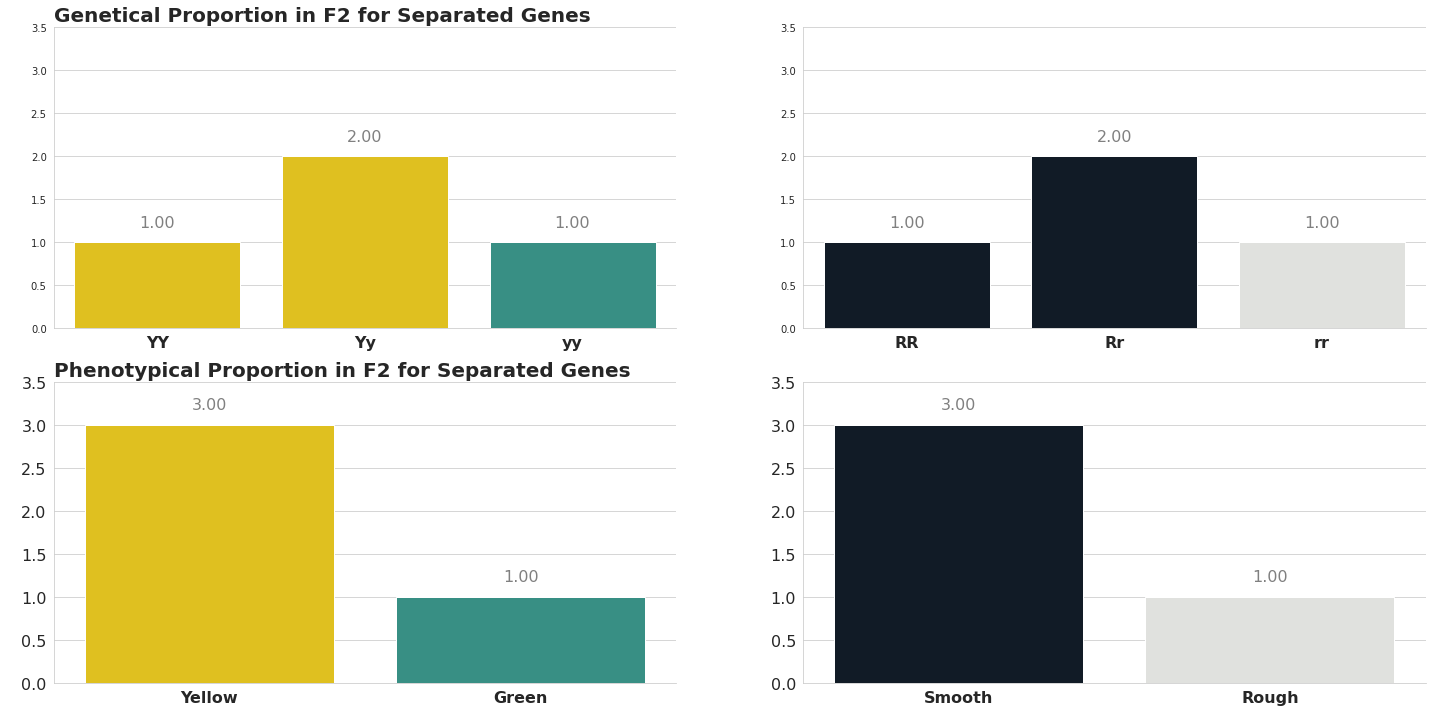

In [11]:
color_pallete = ['#ffd500','#ffd500', '#2a9d8f','#2a9d8f']
rugosity_pallete = ['#0d1b2a','#0d1b2a','#e0e1dd', '#e0e1dd']

sns.set_style('whitegrid')
plt.figure(figsize = (20,10))
keys_a = prop_a.keys()

plt.subplot(2,2,1)
fig = sns.barplot(x = list(prop_a.keys()),
            y = list(prop_a.values()),
            palette = color_pallete)

for p in fig.patches:
    fig.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=16, color='gray', xytext=(0, 20),
                textcoords='offset points')
_ = fig.set_ylim(0,3.5) #To make space for the annotations

plt.xticks(fontsize = 16, weight = 'bold')
plt.title('Genetical Proportion in F2 for Separated Genes', fontsize = 20 , loc = 'left',
          weight = 'bold')
sns.despine()

plt.subplot(2,2,2)
fig = sns.barplot(x = list(prop_b.keys()),
            y = list(prop_b.values()),
            palette = rugosity_pallete,
            )
for p in fig.patches:
    fig.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=16, color='gray', xytext=(0, 20),
                textcoords='offset points')
_ = fig.set_ylim(0,3.5) #To make space for the annotations


plt.xticks(fontsize = 16 , weight = 'bold')
plt.subplot(2,2,3)
fig = sns.countplot(phenotypes_a, palette = [color_pallete[0], color_pallete[2]])
for p in fig.patches:
    fig.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=16, color='gray', xytext=(0, 20),
                textcoords='offset points')
_ = fig.set_ylim(0,3.5) #To make space for the annotations

plt.ylabel(' ')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16, weight = 'bold')
plt.title('Phenotypical Proportion in F2 for Separated Genes',fontsize = 20, loc = 'left', weight = 'bold')
sns.despine()

plt.subplot(2,2,4)
fig = sns.countplot(phenotypes_b, palette = [rugosity_pallete[0], rugosity_pallete[2]])

for p in fig.patches:
    fig.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=16, color='gray', xytext=(0, 20),
                textcoords='offset points')
_ = fig.set_ylim(0,3.5) #To make space for the annotations

plt.ylabel(' ')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16, weight = 'bold')
sns.despine()


plt.tight_layout()

In [12]:
print(prop_a)
print(prop_b)

{'YY': 1, 'Yy': 2, 'yy': 1}
{'RR': 1, 'Rr': 2, 'rr': 1}


In [13]:
def Genotypes_f2(dict_proportion_a, dict_proportion_b):
    lista_prop_a = list(dict_proportion_a.keys())
    lista_prop_b = list(dict_proportion_b.keys())



    dictionary_prop = {}

    for i in lista_prop_a:
        for u in lista_prop_b:
            dictionary_prop[i+u] = int(dict_proportion_a[i]) * int(dict_proportion_b[u])
    return dictionary_prop

In [14]:
dictionary_prop = Genotypes_f2(dict_proportion_a = prop_a, dict_proportion_b = prop_b)

In [15]:
def Phenotype_F2(phenotypes_a,phenotypes_b):

    phenotypes_f2 = [] 


    for i in phenotypes_a:
        for u in phenotypes_b:
            phenotypes_f2.append(i + ' ' + u )
    return phenotypes_f2



In [16]:
phenotypes_f2 = Phenotype_F2(phenotypes_a,phenotypes_b)

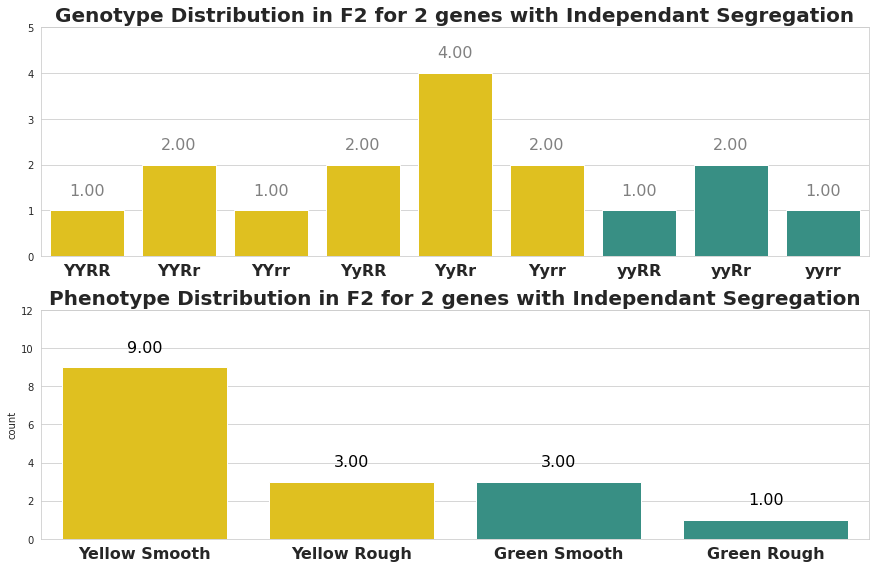

In [17]:
k = [] 

for i in range(0,6):
    k.append(color_pallete[0])

for i in range(0,5):
    k.append(color_pallete[2])
plt.figure(figsize = (13,8))
plt.subplot(2,1,1)
fig = sns.barplot(x = list(dictionary_prop.keys()),
            y = list(dictionary_prop.values()),
            palette = k)
plt.title('Genotype Distribution in F2 for 2 genes with Independant Segregation', weight = 'bold' , loc = 'center' , fontsize = 20)
plt.xticks(fontsize = 16 , weight = 'bold',)

for p in fig.patches:
    fig.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=16, color='gray', xytext=(0, 20),
                textcoords='offset points')
_ = fig.set_ylim(0,5) #To make space for the annotations



h = ["#ffadad","#ffd6a5","#fdffb6","#caffbf","#9bf6ff","#a0c4ff","#bdb2ff","#ffc6ff","#fffffc"]
plt.subplot(2,1,2)
fig = sns.countplot(phenotypes_f2, palette =color_pallete)
plt.title('Phenotype Distribution in F2 for 2 genes with Independant Segregation',fontsize = 20, loc = 'center' , weight = 'bold')
for p in fig.patches:
    fig.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=16, color='black', xytext=(0, 20),
                textcoords='offset points')
plt.xticks(fontsize = 16, weight = 'bold')
fig.set_ylim(0,12)

plt.tight_layout()